In [12]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import requests
from matplotlib.pyplot import imshow
import numpy as np

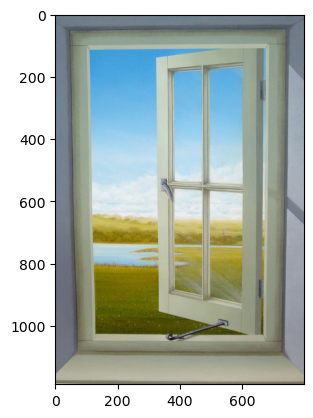

In [13]:
url = 'https://c.neevacdn.net/image/fetch/s--EIqDXnsy--/https%3A//3.bp.blogspot.com/-XrdXBN7sniA/TmUQ4a2P_bI/AAAAAAAAANg/eNHPDIlnjaA/s1600/open-window.jpg?savepath=open-window.jpg'
image = Image.open(requests.get(url, stream=True).raw)
imshow(np.asarray(image))

In [14]:
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits
# model predicts one of the 1000 ImageNet classes
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: window screen
